In [9]:
import sklearn as sk
import pandas as pd
import numpy as np
import scipy as sc
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler as SS
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [10]:
os.listdir(".")
dwc = pd.read_csv("cooling.csv", sep='\t')#data with cooling
dwoc = pd.read_csv("cooling_out.csv", sep='\t')#data wiithout cooling

## WITH COOLING

In [11]:
dwc.tail()

,Параметр размера распределения Росина- Раммлера. м,Параметр ширины распределения Росина - Раммлера,Диаметр представительных частиц. м,Скорость ввода завесного охлаждения. м/с,Осевая компонента скорости,Радиальная компонента скорости,Тангенциальная компонента скорости,Средний диаметр Заутера. м,Расходный комплекс. м/с,Давление. Па
155,0.000570,14.0,0.0001,1.0,3.0,2.0,2.10,0.000557,1153.407,693488
156,0.000630,18.0,0.0001,1.0,3.0,2.0,2.14,0.000617,1154.694,694262
157,0.000670,15.0,0.0001,1.0,3.0,2.0,2.10,0.000655,1118.102,672261
158,0.000704,14.0,0.0001,1.0,3.0,2.0,2.10,0.000688,1078.079,648197
159,0.000898,14.0,0.0001,1.0,3.0,2.0,2.10,0.000876,1078.915,648700


In [12]:
names = [i for i in dwc]
x_names = names[:-2]
y_names = names[-2:]
data = dwc.as_matrix()
X = data[:, :8]
Y = data[:, -2:]
print X.shape, Y.shape

(160, 8) (160, 2)


## Correlations

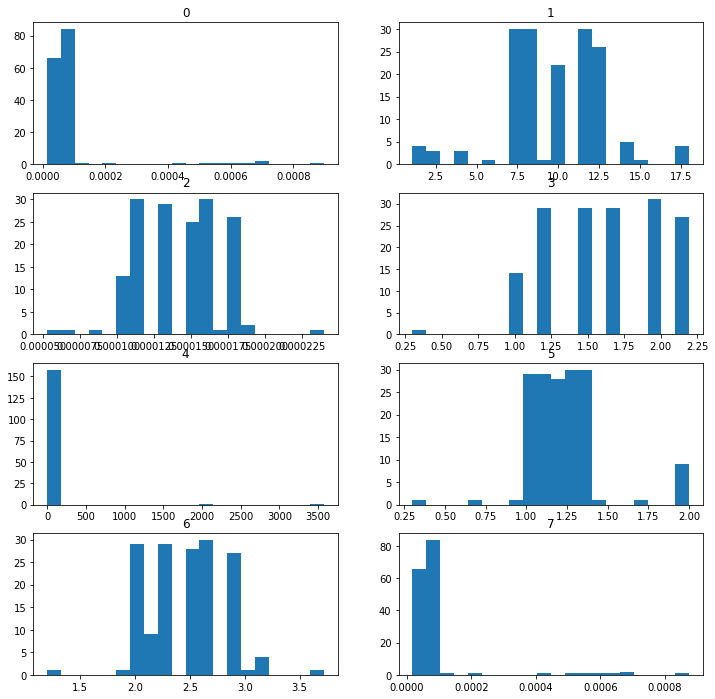

In [13]:
plt.figure(figsize=(12, 12))
plt.title("X values")
for i in range(8):
    plt.subplot(421 + i)
    plt.title(i)
    plt.hist(X[:, i], 20)

In [14]:
ss = SS()
Xs = ss.fit_transform(X)

for Pressure


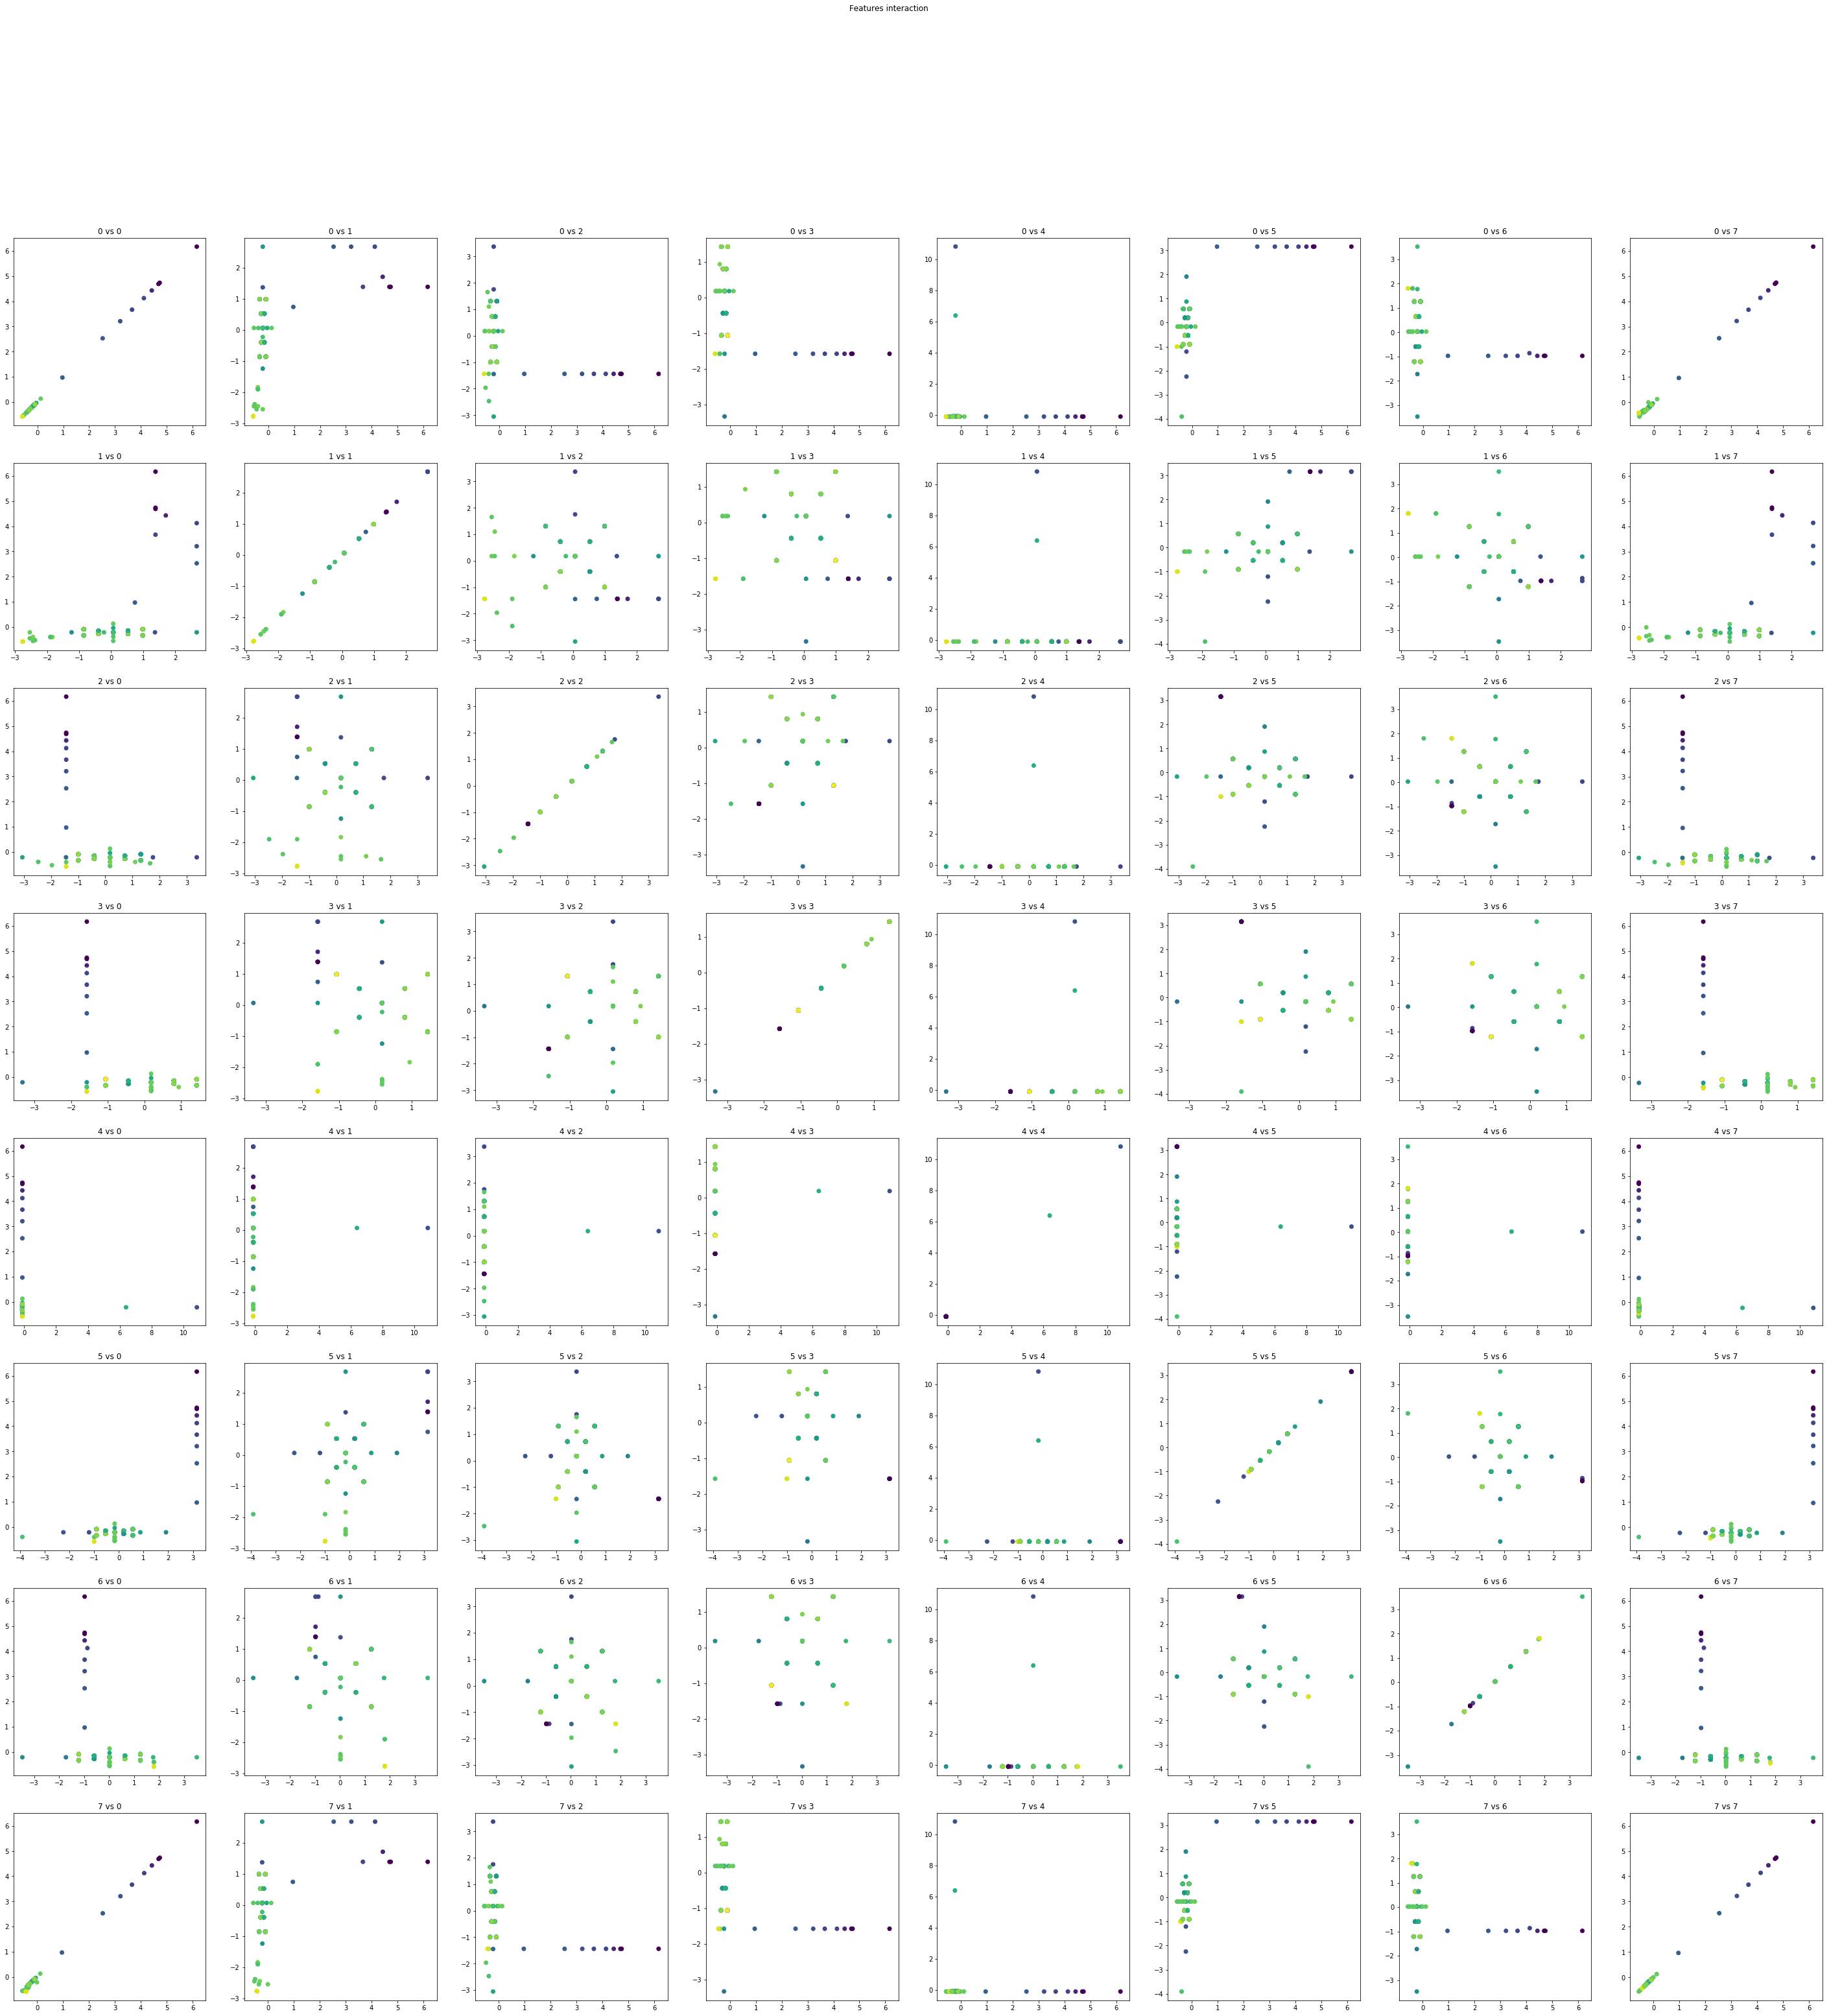

In [15]:
fig, axes = plt.subplots(8, 8, figsize=(50, 50))
fig.suptitle("Features interaction")

for i in range(Xs.shape[1]):
    for j in range(Xs.shape[1]):
        axes[i, j].set_title("{} vs {}".format(i, j))
        axes[i, j].scatter(Xs[:, i], Xs[:, j], c=Y[:, 1])
        
fig.savefig("Graphics.png")
print "for Pressure"

In [16]:
corr = np.corrcoef(X.T)
pd.DataFrame(corr, columns=x_names)

,Параметр размера распределения Росина- Раммлера. м,Параметр ширины распределения Росина - Раммлера,Диаметр представительных частиц. м,Скорость ввода завесного охлаждения. м/с,Осевая компонента скорости,Радиальная компонента скорости,Тангенциальная компонента скорости,Средний диаметр Заутера. м
0,1.000000,0.440364,-0.319290,-0.353097,-0.023375,0.729284,-0.228066,0.999617
1,0.440364,1.000000,-0.061615,-0.133494,0.007440,0.414268,-0.215025,0.426595
2,-0.319290,-0.061615,1.000000,0.190086,0.018992,-0.187200,0.027077,-0.321959
3,-0.353097,-0.133494,0.190086,1.000000,0.019908,-0.247876,0.022559,-0.356801
4,-0.023375,0.007440,0.018992,0.019908,1.000000,-0.018252,0.002319,-0.024160
5,0.729284,0.414268,-0.187200,-0.247876,-0.018252,1.000000,-0.234307,0.727807
6,-0.228066,-0.215025,0.027077,0.022559,0.002319,-0.234307,1.000000,-0.224350
7,0.999617,0.426595,-0.321959,-0.356801,-0.024160,0.727807,-0.224350,1.000000


In [17]:
corrs = []
for i in range(1, 8):
    for j in range(i):
        corrs.append(((i, j), corr[i][j]))
        
corrs.sort(cmp=lambda x, y: cmp(y[1], x[1]))
for i in corrs:
    if i[1] < 0.5:
        break
    print x_names[i[0][0]], x_names[i[0][1]], i[1]
    print

Средний диаметр Заутера. м Параметр
размера
распределения 
Росина- Раммлера. м
0.999616954831

Радиальная компонента скорости Параметр
размера
распределения 
Росина- Раммлера. м
0.729283805149

Средний диаметр Заутера. м Радиальная компонента скорости 0.727806558181



Y values


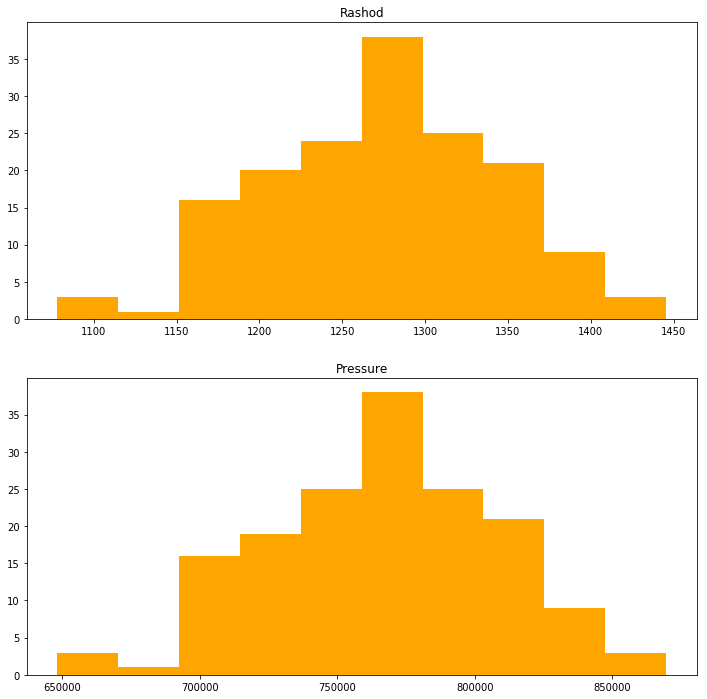

In [18]:
plt.figure(figsize=(12, 12))
print "Y values"
Y_names = ["Rashod", "Pressure"]
for i in range(2):
    plt.subplot(211 + i)
    plt.title(Y_names[i])
    plt.hist(Y[:, i], color="orange")

In [20]:
np.corrcoef(Y.T)

array([[ 1.        ,  0.99999863],
       [ 0.99999863,  1.        ]])

## Modeling

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
x_train.shape, y_train.shape

((107, 8), (107, 2))

In [24]:
model = LR()
fs = range(3)
model = KNR(n_neighbors=2)
model.fit(x_train[:, fs], y_train)
y_pred = model.predict(x_test[:, fs])
print r2_score(y_test[:, 0], y_pred[:, 0])
y_pred.shape
print y_names[0]

-0.0630719237155
Расходный комплекс. 
м/с


In [25]:
model = LR()
model.fit(x_train[:, :7], y_train[:, 1])
y_p = model.predict(x_test[:, :7])
print r2_score(y_test[:, 1], y_p)

0.151280935586


In [26]:
model = LR()
model = KNR()
svr_rbf = SVR(kernel='rbf')
svr_lin = SVR(kernel='linear')
svr_poly = SVR(kernel='poly')
model = svr_rbf
model = svr_lin
model = svr_poly
model.fit(x_train[:, :3], y_train[:, 0])
y_p = model.predict(x_test[:, :3])
print r2_score(y_test[:, 0], y_p)

-0.0283020755986


## Space reduction

In [27]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [28]:
print X.shape
pca.transform(X).shape

(160, 8)


(160, 8)

## tSNE ans other

In [29]:
from sklearn.manifold import TSNE

In [36]:
t = TSNE(n_components=2)
d2 = t.fit_transform(X)

In [37]:
d2.shape

(160, 2)

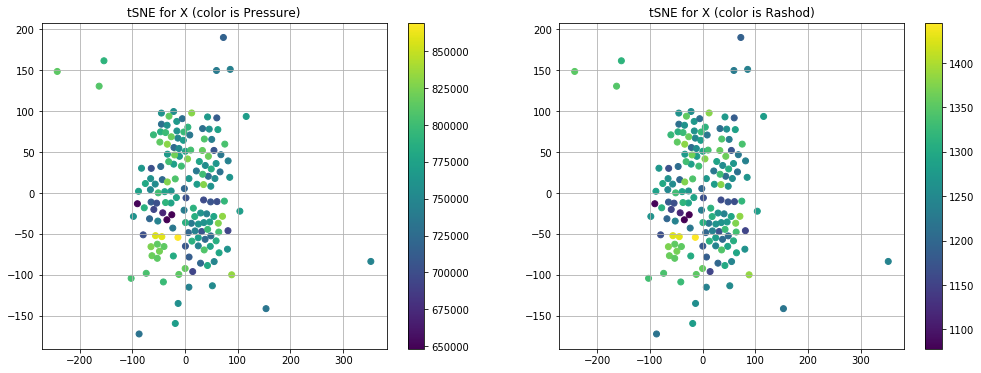

In [38]:
plt.figure(figsize=(17, 6))

plt.subplot(121)
plt.title("tSNE for X (color is Pressure)")
plt.scatter(d2[:, 0], d2[:, 1], c=Y[:, 1])
plt.grid()
plt.colorbar()

plt.subplot(122)
plt.title("tSNE for X (color is Rashod)")
plt.scatter(d2[:, 0], d2[:, 1], c=Y[:, 0])
plt.grid()
plt.colorbar()

## Clustering

In [34]:
ss = SS()
Xs = ss.fit_transform(X)

In [35]:
from sklearn.cluster import DBSCAN

In [56]:
cl = []
for i in np.arange(0.1, 5.0, 0.1):
    cl.append(DBSCAN(eps=i, min_samples=4))
    ans = cl[-1].fit_predict(Xs) + 1
    
    print i, np.bincount(ans)
    

0.1 [160]
0.2 [160]
0.3 [153   7]
0.4 [153   7]
0.5 [153   7]
0.6 [153   7]
0.7 [153   7]
0.8 [109   4   7   4   4   4   4   4   4   4   4   4   4]
0.9 [109   4   7   4   4   4   4   4   4   4   4   4   4]
1.0 [90  7  7  8  6  7  8  7  8  8  4]
1.1 [80  7 12  7  8  6  8  7  8  8  5  4]
1.2 [79 71  5  5]
1.3 [ 23 132   5]
1.4 [ 18 137   5]
1.5 [ 14 139   7]
1.6 [ 11 142   7]
1.7 [  9 144   7]
1.8 [  6 147   7]
1.9 [  6 147   7]
2.0 [  6 147   7]
2.1 [  5 147   8]
2.2 [  4 148   8]
2.3 [  4 148   8]
2.4 [  4 148   8]
2.5 [  4 148   8]
2.6 [  4 148   8]
2.7 [  4 148   8]
2.8 [  4 148   8]
2.9 [  4 148   8]
3.0 [  3 148   9]
3.1 [  2 150   8]
3.2 [  2 150   8]
3.3 [  2 158]
3.4 [  2 158]
3.5 [  2 158]
3.6 [  2 158]
3.7 [  2 158]
3.8 [  2 158]
3.9 [  2 158]
4.0 [  2 158]
4.1 [  2 158]
4.2 [  2 158]
4.3 [  2 158]
4.4 [  2 158]
4.5 [  2 158]
4.6 [  2 158]
4.7 [  2 158]
4.8 [  2 158]
4.9 [  2 158]


In [58]:
clr = DBSCAN(eps=1.1, min_samples=4)
cls = clr.fit_predict(Xs)

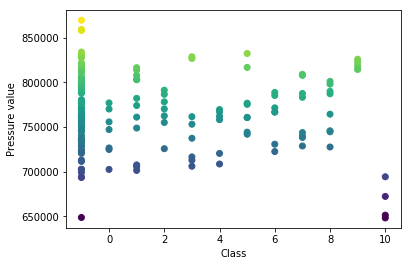

In [70]:
plt.scatter(cls, Y[:, 1], c=Y[:, 1])
plt.xlabel("Class")
plt.ylabel("Pressure value")

### TODO Radar plot for clustering